In [3]:
R.version.string

[1] "R version 4.4.1 (2024-06-14 ucrt)"

    The column or features in the dataset:
    
    Id
    ProductId — unique identifier for the product
    UserId — unqiue identifier for the user
    ProfileName
    HelpfulnessNumerator — number of users who found the review helpful
    HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not
    Score — rating between 1 and 5
    Time — timestamp for the review
    Summary — brief summary of the review
    Text — text of the review

In [2]:
library("IRdisplay")

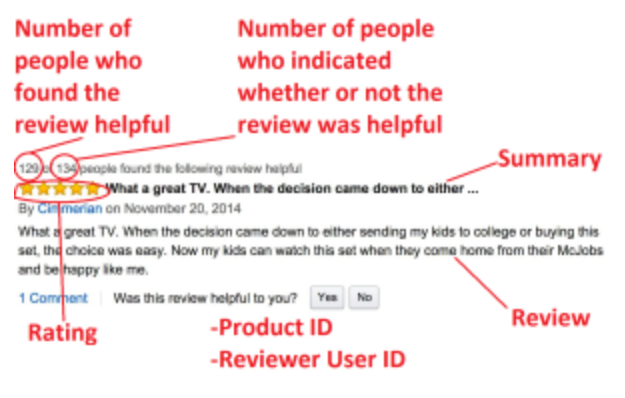

In [3]:
display_png(file = 'R:/All_Datasets/Data_Analysis_Projects/Amazon/Snapshots_R/amazon.png')

## while mentioning file path , mention either '/' or '\\' or '//'
## Note : '\'(single backward slash) will not work .. ie R uses forward slash instead of single backward slash in filename !

## 1.. reading data from Sqlite database

In [ ]:
"

Whole db is divided into 2 categories :

a) relational db 
b) non -relational db 


In relational db , the data is stored in tables, where each table has rows and columns (like a spreadsheet or a csv data)

In non relational db , Data is stored in documents(MongoDB) or in key-value pairs(Redis, DynamoDB) or in nodes and edges(Graph Databases like Neo4j)


sqlite is a relational db ( ie we have data in the form of tables )..

"

In [ ]:
"

You can think of SQLite db as a file that holds multiple tables 
(similar to spreadsheets or as csv), 
and you can perform actions like adding, updating, or retrieving data 
using a language called SQL (Structured Query Language).


It's widely used in mobile apps, small web applications, and for 
local data storage because it's fast, simple, and doesn’t require much setup.

"

In [6]:
# install.packages('DBI')
# install.packages('RSQLite')

In [7]:
library(DBI)
library(RSQLite)

In [2]:
help(dbConnect)

## Create a connection to a DBMS

In [8]:
args(dbConnect)

function (drv, ...) 
NULL

In [ ]:
"

drv: This is the database driver object. It represents the interface 
        to a specific database management system (DBMS)
     Various DBMS-specific drivers are RSQLite::SQLite() , 
                RMySQL::MySQL() and RPostgreSQL::PostgreSQL()..

    As I want connection with SQLite database , hence we have to use 
    SQLite() driver which belongs to RSQLite package..
    ie RSQLite :: SQLite()

"

In [ ]:
# very first u have to create a SQL connection to our SQLite database

In [9]:
# Define the path to the SQLite database file

## db_file = "G:/Data Science projects/By_me/ML/Amazon/Dataset/database.sqlite" # OLD PC

db_file = "R:/All_Datasets/Data_Analysis_Projects/Amazon/database.sqlite"
con = DBI :: dbConnect(SQLite(), db_file)

## while mentioning file path , mention either '/' or '\\' or '//' as separator
## Note : '\'(single backward slash) will not work .. 
## ie R uses forward slash instead of single backward slash in filename

# Now 'con' is the SQLite database connection object

In [10]:
class(con)

[1] "SQLiteConnection"
attr(,"package")
[1] "RSQLite"

In [ ]:
"

dbConnect function to connect to the SQLite database, specifying SQLite() as the driver
and providing the database file name using the dbname parameter..


"

In [6]:
help(dbListTables)

In [ ]:
"
dbListTables(conn, ...)
"

In [5]:
dbListTables(con) ## return table-name from which we have to fetch data ..

[1] "Reviews"

In [12]:
# Get table/dataframe..
df = dbReadTable(con, 'Reviews')

# takes 10-15 sec in NEW PC !

# takes around 30-40 sec .. ->> OLD PC
# df = dbGetQuery(con, "SELECT * FROM Reviews") # takes 10 sec 

In [13]:
dim(df)

[1] 568454     10

In [9]:
head(df , 2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."


## 2.. Data Preparation !
    Doing basic cleaning/Data wrangling(remove invalid rows , remove duplicate rows ..) + convert time to date-time

In [ ]:
'''

HelpfulnessDenominator is : people found useful count + people found not 
                            so useful count (ie how many people reviewed )

Helpfulnessnumerator is among those how many found it helpful…..
                            consider it like a percentage….

So, from this we can see that HelfulnessNumerator is always less than
                            or equal to HelpfulnesDenominator..

'''

In [6]:
df[df$HelpfulnessNumerator > df$HelpfulnessDenominator , ]  ## df[rows , cols]

## df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator'] , ]  ## invalid rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
44737,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,"It was almost a 'love at first bite' - the perfectly roasted almond with a nice thin layer of pure flavorful cocoa on the top.<br /><br />You can smell the cocoa as soon as you open the canister - making you want to take a bite.<br /><br />You may or may not like the taste of this cocoa roasted almonds depending on your likingness for cocoa. We are so much used to the taste of chocolate (which is actually cocoa + many other ingredients like milk ...) - that you might have never really tasted really cocoa.<br /><br />Tasting this item it like tasting and enjoying flavorful pure raw cocoa with crunchy almonds in the center. Get yourself a box and see for yourself what real cocoa + almonds is !<br /><br />Where this product loses a star is in its packaging - the external sleeve is kind of comes in one piece, so if you try to remove the lid, the external sleeve kind of tends to come off fully - so careful when you are removing the external sleeve for the canister."
64422,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate ordering this for him. He says they are great. I have tried them myself and they are delicious. Just open and pop them in the microwave. It is very easy. The best thing about ordering from Amazon grocery is that they deliver to your door. If you have a loved one that lives far away and may have limited transportation this is the answer. Just order what you want them to have and Amazon takes care of the rest.


In [14]:
df_valid  = df[df$HelpfulnessNumerator <= df$HelpfulnessDenominator , ] ## valid rows 

In [15]:
dim(df_valid)

[1] 568452     10

#### lets find out whether instances/rows are duplicate or not !


    Deduplication means removing duplicate rows, It is necessary to remove duplicates in order to get unbaised results,
    
    Checking duplicates based on UserId, ProfileName, Time, Text as No user can type a review on same exact time for 
    different products, so we will remove those records
    

In [16]:
names(df_valid)

[1] "Id"                     "ProductId"              "UserId"                
 [4] "ProfileName"            "HelpfulnessNumerator"   "HelpfulnessDenominator"
 [7] "Score"                  "Time"                   "Summary"               
[10] "Text"

In [ ]:
### since we have learnt how to detect & remove duplicate rows in uber 
#### & bitcoin case-study using duplicated() base-R function
### let me show you one more way ! 

In [11]:
duplicated(df_valid[ , c("UserId","ProfileName","Time","Text")]) # takes 5-10 sec

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [17]:
dim(df_valid[duplicated(df_valid[ , c("UserId","ProfileName","Time","Text")]) , ]) # takes 5-10 sec

### 174521 rows are duplicated ..

[1] 174521     10

In [19]:
library(dplyr)

## library("dplyr")
## execute twice..

In [ ]:
## we have used this syntax : data[rows , cols] to detect duplicate rows 
## where we have used duplicated() to do this in 2nd & 6th session of Uber case-study !

## & we have used data[rows , cols ] in 2nd session Uber & 
## dplyr :: distinct() in 6th session Uber to remove duplicate rows..

In [ ]:
## we have used subset() in 3rd session of Bitcoin to drop feature !

In [15]:
help(subset) 

## Subsetting Vectors, Matrices and Data Frames
## subset is a base-R function 

In [ ]:
"

subset(x, ...)

## Default S3 method:
subset(x, subset, ...)

    This is the default method of the subset function, suitable for most 
    objects like vectors, data frames, etc.
    In simple terms in R, S3 stands for "Simple, Structured, and Sensible." 
    It's a basic system for object-oriented programming
                OR
    In R, S3 methods are a way to implement object-oriented programming.



## S3 method for class 'matrix'
subset(x, subset, select, drop = FALSE, ...)

## S3 method for class 'data.frame'
subset(x, subset, select, drop = FALSE, ...)

"




## S3 method for class 'data.frame'
subset(x, subset, select, drop = FALSE, ...)

"
x : object to be subsetted..

subset : A logical expression indicating the conditions used to 
         subset the data frame. 
         Rows for which the expression evaluates to TRUE will be included in the subset..

select : expression, indicating columns to select from a data frame..

"

In [16]:
dim(subset(df_valid, duplicated(df_valid[,c("UserId","ProfileName",
                                            "Time","Text")]))) # takes 5-10 sec

## dim(subset(x = df_valid , subset = duplicated(df_valid[,c("UserId",
                                        "ProfileName","Time","Text")])))

### 174521 rows are duplicated ..

[1] 174521     10

In [16]:
dim(subset(df_valid, !duplicated(df_valid[,c("UserId","ProfileName",
                                             "Time","Text")]))) # takes 5-10 sec

### 393931 rows are not duplicated ..

[1] 393931     10

In [ ]:
### lets use chaining or piping to make it more readable !

In [18]:
dim(df_valid %>% subset(!duplicated(df_valid[,c("UserId","
                                        ProfileName","Time","Text")]))) ## more readable !

[1] 393931     10

In [20]:
data = df_valid %>% subset(!duplicated(df_valid[,c("UserId",
                                                   "ProfileName",
                                                   "Time","Text")]))

### make sure u have imported dplyr package before executing it  
### as pipe operator(%>%) comes from the magrittr package, which is often used in conjunction with dplyr

In [ ]:
dim(data)

#### Time — timestamp for the review
    convert time to date-time !

In [18]:
data$Time[1:5]

[1] 1303862400 1346976000 1219017600 1307923200 1350777600

In [ ]:
"

(1303862400, 1346976000, 1219017600------ ) are Unix timestamps.. 

Unix timestamps represent the number of seconds that have passed 
since the beginning of the Unix epoch, 
which is set at January 1, 1970, 00:00:00 Coordinated Universal Time (UTC)...


Summary : when you see a Unix timestamp(value) like 1303862400, 
          it means that 1,303,862,400 seconds have passed since 
           the beginning of January 1, 1970.



If u want to convert this Unix timestamp into human-readable date , 
ie Date Time objects , u can use as.POSIXct()
Why not as.Date ? BCZ as.Date() in R works with days , it doesn't work with Unix timestamps

"

In [17]:
args(as.Date)

function (x, ...) 
NULL

In [ ]:
as.Date(data$Time[1:5] , origin = "1970-01-01") 

## gives wrong value as : 3571824-01-02 , 3689865-01-11 , 3339526-10-31 , 3582942-02-04 , 3700273-06-16
## But why ?
## Ans : BCZ as.Date() in R works with days , it doesn't work with 
## Unix timestamps
## Thats why its good to use that one which can convert Unix timestamps 
## to Date objects in R :

## so let use as.POSIXct() which can handle this :

In [ ]:
## lets do it using as.POSIXct()

In [21]:
help(as.POSIXct)

## Date-time Conversion Functions

In [ ]:
"

as.POSIXct(x, tz = "", ...)


"


"
x : R object to be converted.
tz : time zone specification to be used for the conversion
origin : a date-time object 

"

In [18]:
args(as.POSIXct)

function (x, tz = "", ...) 
NULL

In [10]:
as.POSIXct(data$Time[1:5])

ERROR: Error in as.POSIXct.numeric(data$Time[1:5]): 'origin' must be supplied


In [ ]:
### ie we need to mention origin parameter !

In [11]:
as.POSIXct(data$Time[1:5], origin = "1970-01-01", tz = "UTC")

[1] "2011-04-27 UTC" "2012-09-07 UTC" "2008-08-18 UTC" "2011-06-13 UTC"
[5] "2012-10-21 UTC"

In [ ]:
"
origin = "1970-01-01": 
This part of the code specifies the origin or reference point 
for the datetime conversion. 

In this case, you're using the Unix start time, which is January 1, 1970. 
The numeric time values you're providing are assumed to be the 
number of seconds passed from January 1, 1970.. 

ie , origin = "1970-01-01" tells R that we want to measure time from 
January 1, 1970..



tz = "UTC": 
The tz argument specifies the time zone ..
In this case, "UTC" is used, which represents Coordinated Universal Time. 
You can change this to a different time zone if your data is in a 
different time zone..

ie , tz = "UTC" specifies the time zone to be Coordinated Universal Time 
            (UTC), which is a standard time zone used worldwide.


"

In [21]:
data$Time = as.POSIXct(data$Time , origin = "1970-01-01" , tz = "UTC")

## hardly takes 1-2 sec

In [22]:
head(data , 1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dttm>,<chr>,<chr>
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.


## 3.. Analyse to what User Amazon Can recommend more product ?

#### Amazon can recommend more products to only those who are going to buy 
#### more or to one who has a better conversion rate,so lets ready data according to this problem statement

In [23]:
dim(data)

[1] 393931     10

In [24]:
length(unique(data$ProfileName))

## ie total Profile-names are 218418
## ie Profile_Name could be same but User-ID will be different , 
## so lets consider User-ID for this analysis..

[1] 218418

In [ ]:
length(unique(data$UserId))

## ie total users are 256059

In [25]:
head(data , 2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dttm>,<chr>,<chr>
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."


In [ ]:
### we have shed light on group_by multi-times in Uber & Bitcoin case-study !

In [26]:
library(dplyr)

In [27]:
help(group_by)

### Group by one or more variables !

group_by {dplyr},R Documentation
.data,"A data frame, data frame extension (e.g. a tibble), or a lazy data frame (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
...,"In group_by(), variables or computations to group by. Computations are always done on the ungrouped data frame. To perform computations on the grouped data, you need to use a separate mutate() step before the group_by(). Computations are not allowed in nest_by(). In ungroup(), variables to remove from the grouping."
.add,"When FALSE, the default, group_by() will override existing groups. To add to the existing groups, use .add = TRUE. This argument was previously called add, but that prevented creating a new grouping variable called add, and conflicts with our naming conventions."
.drop,Drop groups formed by factor levels that don't appear in the data? The default is TRUE except when .data has been previously grouped with .drop = FALSE. See group_by_drop_default() for details.
x,A tbl()


In [28]:
args(group_by)

function (.data, ..., .add = FALSE, .drop = group_by_drop_default(.data)) 
NULL

    .data: This is the data frame that you want to group. 
            It represents the dataset on which u want to apply groupby()

    ...: The ellipsis (...) is a placeholder for additional arguments. 
        In the case of group_by(), it allows you to specify the grouping columns. 
        You can provide column names, expressions, or functions that 
        generate the grouping variables.


In [ ]:
help(summarise)

In [ ]:
"

summarise() creates a new data frame..
It returns one value/row for each combination of grouping variables ;
                    OR
It returns one value for every sub-category in grouping variables ;
eg avg price of category col
                    

if there are no grouping variables, the output will have a 
single value which is summarising rows of a column..

"

In [26]:
args(summarise)

function (.data, ..., .by = NULL, .groups = NULL) 
NULL

    .data : data frame or tibble you want to summarize..

    ... : The ellipsis (...) means I can pass additional arguments, 
          which are typically expressions that define the new columns or summary statistics you want to calculate..

In [ ]:
help(arrange)

### orders the rows of a data frame by the values of selected columns..

In [ ]:
"

function (.data, ..., .by_group = FALSE)
    .data : dataframe on which we are working 
    ... :  <data-masking> Variables, or functions of variables. 
            Use desc() to sort a variable in descending order

"

In [ ]:
args(dplyr :: arrange)

In [ ]:
gdf = group_by(data , UserId)

output = summarise(gdf , Number_of_summaries = n() , num_text = n() , 
                   avg_score = mean(Score) , Number_of_prods_purchased = n())

arrange(output , desc(Number_of_prods_purchased))

## summarise(group_by(data , UserId) , Number_of_summaries = n())

In [ ]:
### lets write similar code using dplyr chaining , 
### as chaining makes code more readable !

### before executing below code , make sure u have installed & 
### imported dplyr as pipe operator is defined in dplyr package

In [29]:
names(data)

[1] "Id"                     "ProductId"              "UserId"                
 [4] "ProfileName"            "HelpfulnessNumerator"   "HelpfulnessDenominator"
 [7] "Score"                  "Time"                   "Summary"               
[10] "Text"

In [31]:
recommend_df = 
data %>% group_by(UserId)  %>% summarise(Number_of_summaries = n() , 
                                         num_text = n() , 
                                         avg_score = mean(Score) , 
                                         Number_of_prods_purchased = n()) %>% 
                                        arrange(desc(Number_of_prods_purchased))

## 'Number_of_summaries','number_of_text','Avg_score','Number_of_products_purchased'
## takes 30 sec - 1 min(OLD PC)

## takes 10-20 sec (NEW PC)

In [32]:
head(recommend_df , 2)

UserId,Number_of_summaries,num_text,avg_score,Number_of_prods_purchased
<chr>,<int>,<int>,<dbl>,<int>
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278


In [33]:
class(recommend_df)

## It can be interpreted as multiple data structure , 
## depending on how it is treated or used in diff. contexts..

[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
"

"tbl_df" and "tbl": 
tbl_df' and 'tbl' are related to tibble package , they are almost 
similar to data frames but with some enhancements, 
such as improved printing and handling of column types , 
easier column-wise operations, and improved handling of missing values.

So If you are working within the tidyverse ecosystem, especially with 
packages like "dplyr" or "ggplot2" , 
the resulting data structure may be treated as a 'tbl_df' or 'tbl' 
because these packages often return data frames as tibbles 
to take advantage of their enhanced features..


        ie In R, "tbl_df" is a subclass of "tbl." 
        By the way "tbl_df" and "tbl" are classes provided by the tibble package, 
        which is an extension of the data frame class in R.



data.frame: 
If you are working with base R functions or other packages that do not use tibbles, 
then data structure may be treated as a standard 'data.frame'.





"

In [ ]:
"

Q: if u print your data using head(data , 5) , sometimes u get tibble ,  
sometimes u get dataframe , Why so ?

Ans : It depend on various factors, including the functions you use, 
the packages you load and the code u are using !

1) Some functions in R have default behavior that returns either a data.frame or a tibble.. 
   For example:
        Functions in the dplyr package, such as mutate() or filter() returns tibble by default.
        Base R functions like read.csv() or read.table() returns dataframe 

2) When you use packages like dplyr or tidyr (part of the tidyverse),  
    many of the functions work with tibble 


3) if you read data from a CSV file using read_csv() from the readr package, 
    it typically returns a tibble. 
   However, if you use read.csv() from base R, it returns a data.frame


"

In [21]:
colnames(recommend_df)

[1] "UserId"                    "Number_of_summaries"      
[3] "num_text"                  "avg_score"                
[5] "Number_of_prods_purchased"

In [ ]:
### lets find Top 10 users ! 

In [22]:
head(recommend_df , 10)

UserId,Number_of_summaries,num_text,avg_score,Number_of_prods_purchased
<chr>,<int>,<int>,<dbl>,<int>
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


In [23]:
user_10 = recommend_df$UserId[1:10]
number_10 = recommend_df$Number_of_prods_purchased[1:10]

In [24]:
user_10

[1] "AY12DBB0U420B"  "A3OXHLG6DIBRW8" "A281NPSIMI1C2R" "A1YUL9PCJR3JTY"
 [5] "A1Z54EM24Y40LL" "A2MUGFV2TDQ47K" "A3D6OI36USYOU1" "AZV26LP92E6WU" 
 [9] "AKMEY1BSHSDG7"  "A2GEZJHBV92EVR"

In [25]:
number_10

[1] 329 278 259 214 211 161 146 129 119 118

In [ ]:
help(barplot)

In [3]:
args(barplot)

## help(barplot)

### barplot(height , width , names.arg)
### height : what about values we have on Y-axis
### names.arg : what about labels we want on X-axis
### main : what about title of plot
### xlab : to set xlabel
### ylab : to set ylabel 

function (height, ...) 
NULL

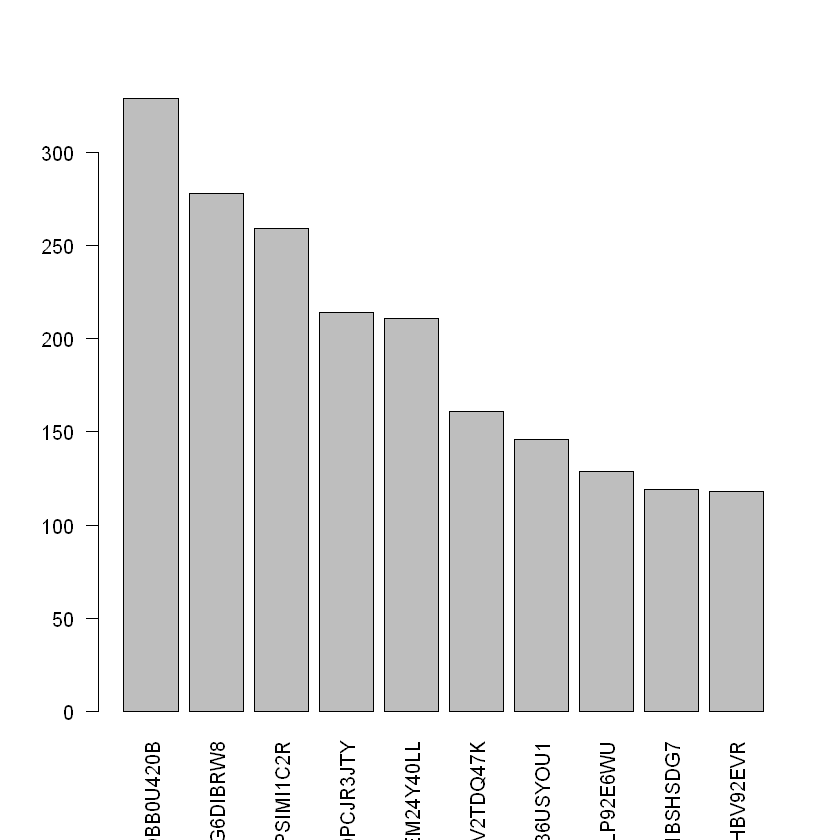

In [26]:
graphics :: barplot(number_10 , names.arg = user_10 , las = 2) ## graphics is a base-R 

In [ ]:
### las refers to label style, and it got four options. 

#   0 is the default, with text always parallel to its axis. 
#   1 is always horizontal, 
#   2 is always perpendicular to the axis and 
#   3 is always vertical..

In [ ]:
'''
Inference : These are the Top 10 Users so we can recommend more & more Products 
            to these User Id 
            as there will be a high probability that these person are going to be buy more
            
'''

## 4.. which product has good number of reviews ? 

In [28]:
names(data)

[1] "Id"                     "ProductId"              "UserId"                
 [4] "ProfileName"            "HelpfulnessNumerator"   "HelpfulnessDenominator"
 [7] "Score"                  "Time"                   "Summary"               
[10] "Text"

In [29]:
length(unique(data$ProductId))

## We can see that there are 67624 types of products in the dataset..

[1] 67624

In [ ]:
### so first filter out data & lets set a condition as ,
## a product must be sold atleast 500 times..

In [ ]:
### Among 67624 products , lets pick most sold product for Analysis 
### We will consider that product as most sold product 
### which must be sold atleast 500 times..

In [ ]:
## how u can come up with a idea that threshold value is 500..
## again it depends upon data behaviour & typically domain expertise 
## suggest u what can be the best value..

In [34]:
prod_count = table(data$ProductId)

### takes 10-20 sec 

In [35]:
prod_count[prod_count > 500] 


B000KV61FC B000NMJWZO B000UBD88A B0013NUGDE B001EO5Q64 B002QWP89S B003B3OOPA 
       556        542        542        558        566        630        622 
B005K4Q37A B005ZBZLT4 B007JFMH8M B0090X8IPM 
       541        505        912        530 

In [36]:
fre_prod_ids = names(prod_count[prod_count > 500])

In [37]:
fre_prod_ids

[1] "B000KV61FC" "B000NMJWZO" "B000UBD88A" "B0013NUGDE" "B001EO5Q64"
 [6] "B002QWP89S" "B003B3OOPA" "B005K4Q37A" "B005ZBZLT4" "B007JFMH8M"
[11] "B0090X8IPM"

In [38]:
fre_prod_df = data[data$ProductId %in% fre_prod_ids , ] ## data[rows , cols]

### "%in% operator" check whether elements of one vector are present in another vector

In [39]:
dim(fre_prod_df)

[1] 6504   10

In [36]:
head(fre_prod_df , 1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dttm>,<chr>,<chr>
20983,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,"my 12 year old sheltie has chronic brochotitis, been on meds for three years, these help with the coughing fits at night. so I like them!!!<br /> one bite and both my dogs are addicted!!! be warned!!! 7 pm both shelties are on my lap howling for the drug fix! I am a dog trainer and have never seen anything like it....<br /><br />three weeks later,, the beloved sheltie got a bowel blockage from these, use with caution.<br />if the cat gets too many she has the runs....<br />sheltie did better when i upped her thryoid meds, and gave her doggie asthma meds.<br />so it worked better for the 18 year old cat, who also has asthma."


In [ ]:
## Since we have built grouped-bar using base-R in Uber case-study in 3rd prb st :
## Which month have max. Uber pickups in New York City ?

## let me show u one another way to build grouped-bar chart : 

        Basic ggplot structure:
        The basic structure of a ggplot2 plot involves :
        a) specifying a data frame 
        b) mapping aesthetic properties, 
        c) and adding geometric layers(adding required plot as per our need)..
        
           The main function is ggplot():

In [40]:
library(ggplot2)

In [41]:
args(ggplot)

function (data = NULL, mapping = aes(), ..., environment = parent.frame()) 
NULL

    data = Dataframe on which u are running it on !

    mapping = u can mention those variables which u want to consider while considering plots
              using aes() along with u can customize x-axis , y-axis , color , size, shape etc..

    ... : This ellipsis argument allows you to pass additional arguments as per need !

In [ ]:
help(geom_bar)

In [ ]:
"

geom_bar(
  mapping = NULL,
  data = NULL,
  stat = "count",
  position = "stack",
  ...,
  just = 0.5,
  width = NULL,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE
)



    mapping : u can mention those variables which u want to consider while considering plots
              along with its customization properties using the aes() function
              eg x-axis position, y-axis position, color, shape, size
              aes(x = variable1, y = variable2) would map variable1 to the x-axis and variable2 to the y-axis.
              If not specified, the data from the ggplot() call is used.

    data : The data frame on which we are working.. , 
                If not specified, the data from the ggplot() call is used..

    stat : This parameter determines how the heights of the bars are calculated. 
            By default, it is set to "count", which count the occurrences of each category..
            Other options include :
            "identity" (use the values in the data directly), 
            "density" (compute a density estimate)
            "frequency" (counts the number of cases)


    position : This parameter is used to create stacked-bar & grouped-bar as per need..
                ie , This parameter specifies how the bars should be positioned. 
                By default, it is set to "stack", which stacks the bars on top of each other. 
                Other options include :
                "dodge" (place the bars side by side)  , ie for grouped-bar chart !
                "fill" (stack bars and normalize each group to have the same height),
                "identity" (no stacking)




    ...: Additional arguments passed on to geom_bar()





"

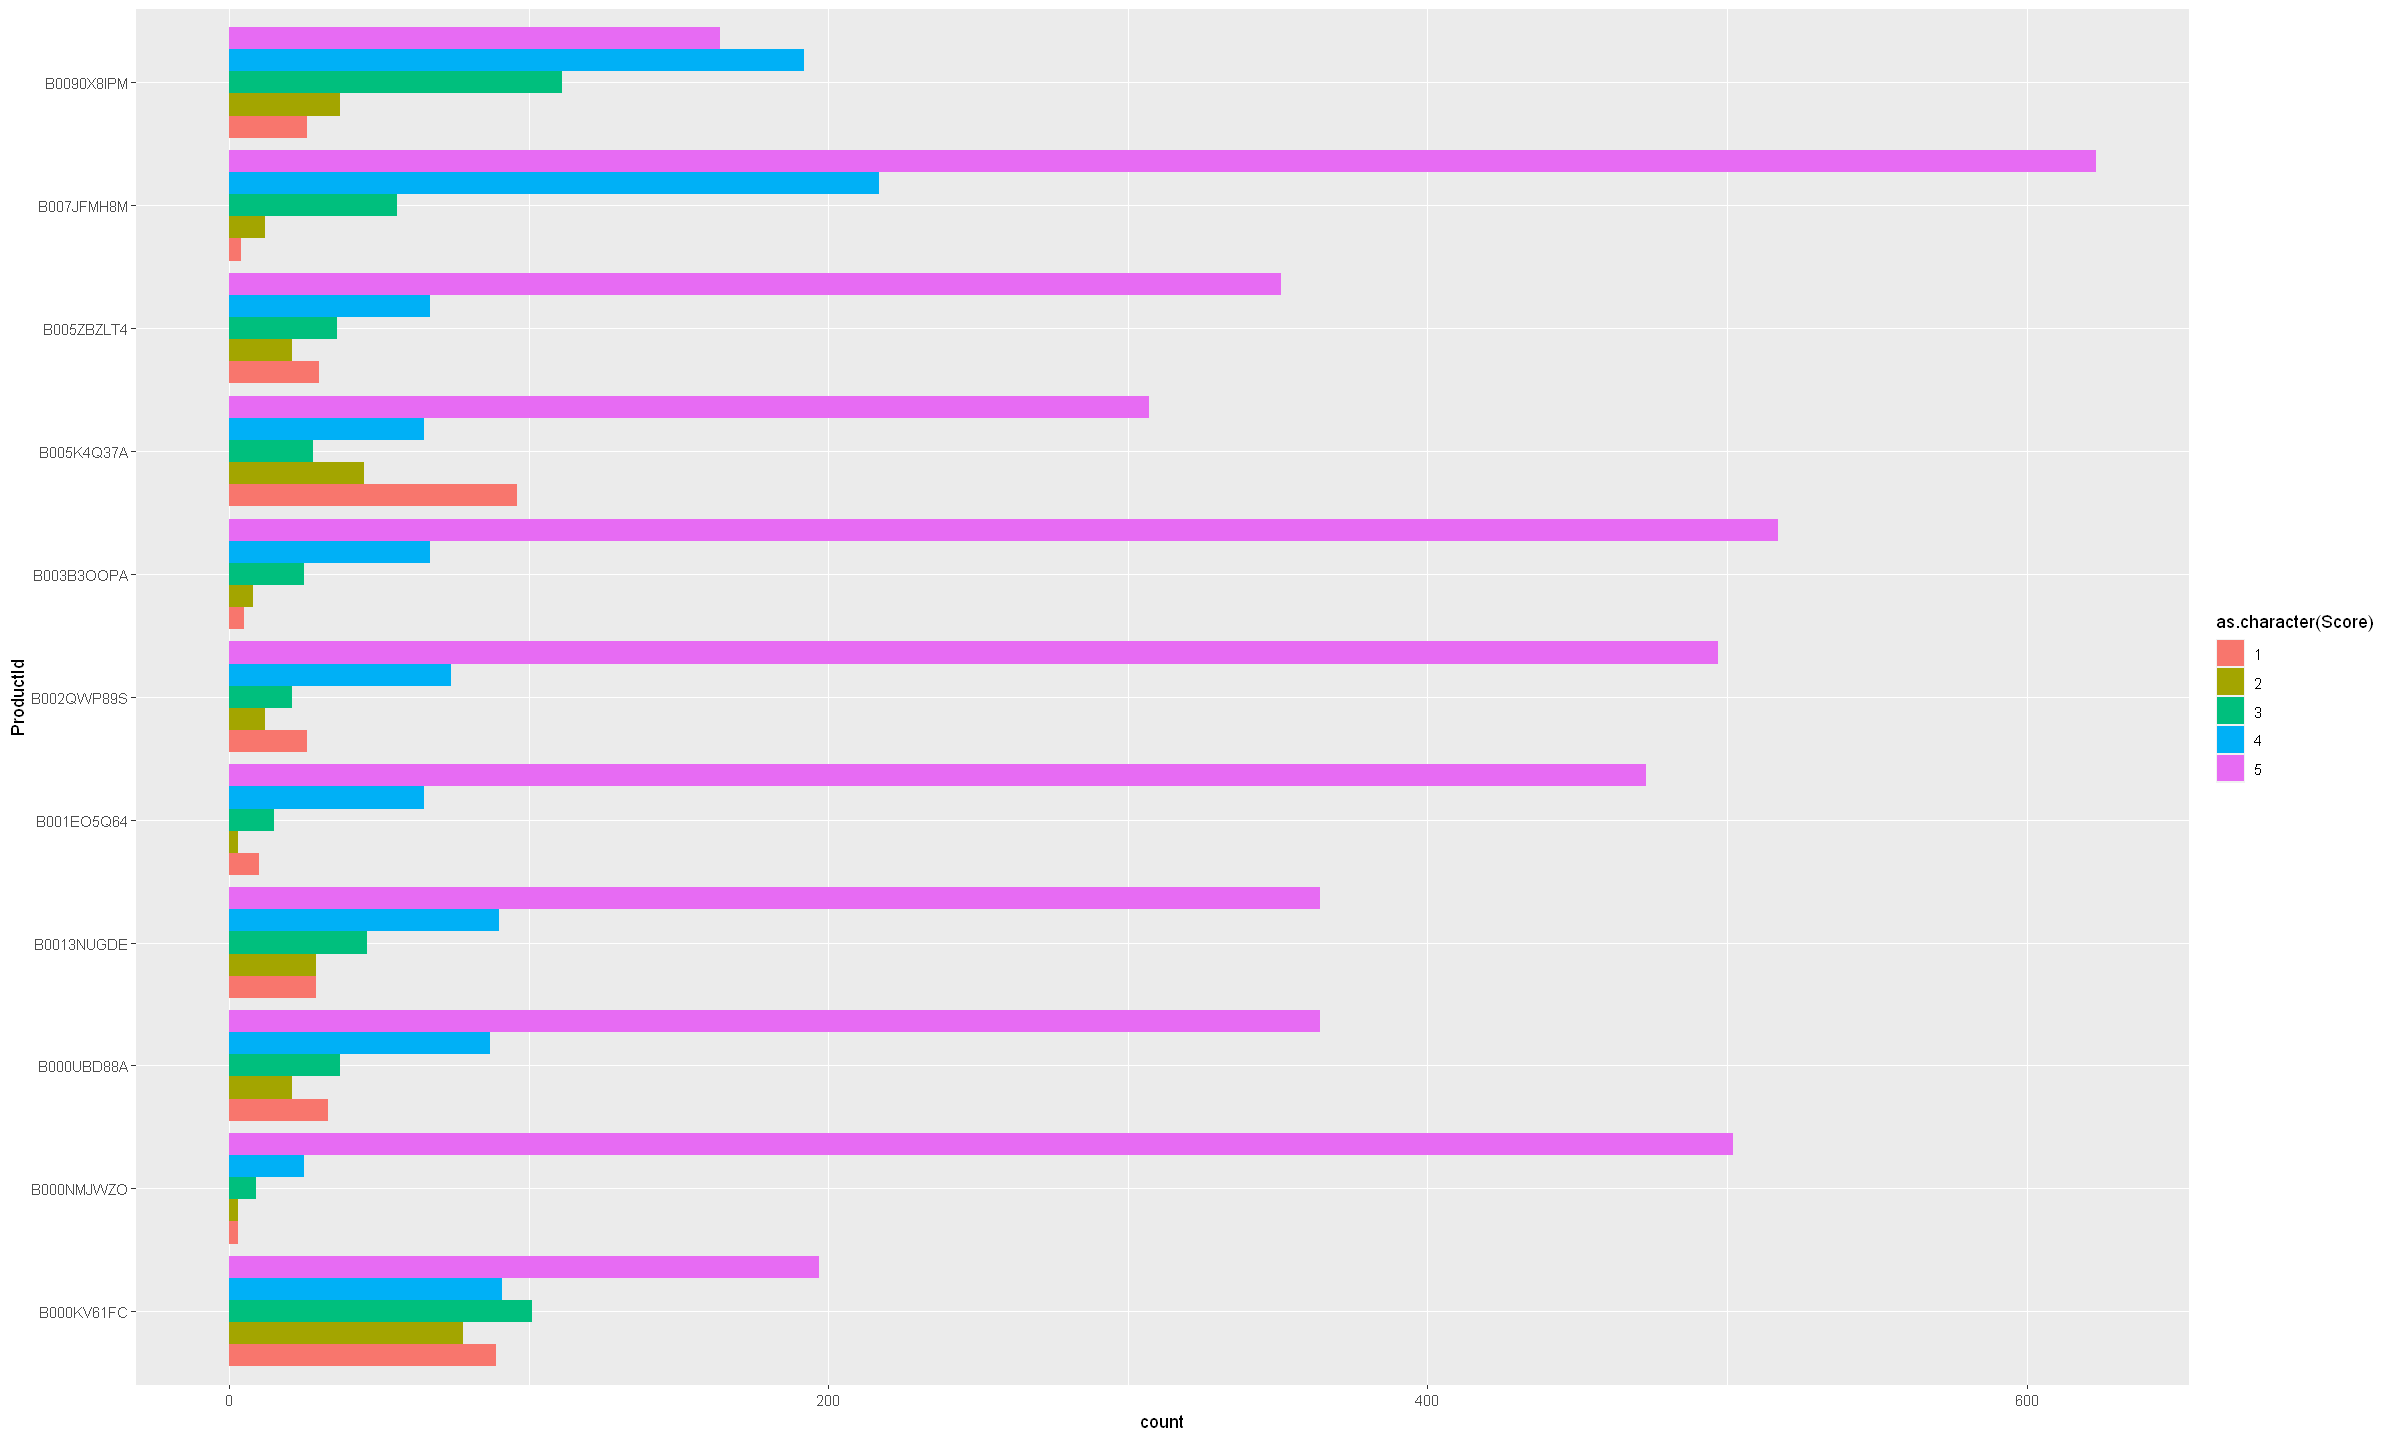

In [38]:

options(repr.plot.width=20, repr.plot.height=12)

# Assuming you have a data frame named fre_prod_df
ggplot2 :: ggplot(fre_prod_df, aes(y = ProductId, fill = as.character(Score))) +
            geom_bar(position = "dodge")


In [ ]:
"

Inside aes(), we specify :

y = ProductId , ie we want "ProductId" column to the y-axis.
## since we have mentioned y-axis , ie on x-axis it will 
## automatically consider count for evry productID on x-axis


fill = as.character(Score) , 
since we have 5 diff sub-categories in "Score" column as "1" , "2", "3" , "4" , "5" 
ie we have to assign 5 diff colors to 5 bars just to distinguish ..


position = "dodge" means I want grouped_bar chart b/w ProductId & 
count for the various scores..


"

## 5.. is there any difference between behaviour of frequent viewers & not frequent viewers ?

In [ ]:
'''

First lets understand who are frequent viewers & who are not frequent viewers ..

Frequent viewers are those who have bought products atleast 50 times or more ..
Non-Frequent viewers are those who have bought products less than 50 times ..


'''

In [16]:
x = as.data.frame(table(data$UserId))

## takes 30 sec 

In [17]:
head(x , 5)

,Var1,Freq
,<fct>,<int>
1,#oc-R103C0QSV1DF5E,1
2,#oc-R109MU5OBBZ59U,1
3,#oc-R10LFEMQEW6QGZ,1
4,#oc-R10LT57ZGIB140,1
5,#oc-R10UA029WVWIUI,1


In [ ]:
help(arrange)

### orders the rows of a data frame by the values of selected columns..

In [ ]:
"

function (.data, ..., .by_group = FALSE)
    .data : dataframe on which we are working 
    ... :  <data-masking> Variables, or functions of variables. 
                Use desc() to sort a variable in descending order

"

In [9]:
args(dplyr :: arrange)

function (.data, ..., .by_group = FALSE) 
NULL

In [18]:
dplyr :: arrange(x , desc(Freq))

## "AY12DBB0U420B" has bought 329 products ..
## "A3OXHLG6DIBRW8" has bought 278 products ..

Var1,Freq
<fct>,<int>
AY12DBB0U420B,329
A3OXHLG6DIBRW8,278
A281NPSIMI1C2R,259
A1YUL9PCJR3JTY,214
A1Z54EM24Y40LL,211
A2MUGFV2TDQ47K,161
A3D6OI36USYOU1,146
AZV26LP92E6WU,129
AKMEY1BSHSDG7,119


In [19]:
pop_user_ids = dplyr :: arrange(x , desc(Freq))[ , 'Var1'][1:50]

In [20]:
pop_user_ids

[1] AY12DBB0U420B  A3OXHLG6DIBRW8 A281NPSIMI1C2R A1YUL9PCJR3JTY A1Z54EM24Y40LL
 [6] A2MUGFV2TDQ47K A3D6OI36USYOU1 AZV26LP92E6WU  AKMEY1BSHSDG7  A2GEZJHBV92EVR
[11] A1IU7S4HCK1XK0 A33AQPJYH7UUXR A1WX42M589VAMQ A3F3B1JPACN215 A2DPYMNI2HCIOI
[16] AY1EF0GOH80EK  A2Y8IDC1FKGNJC A2R6RA8FRBS608 AQQLWCMRNDFGI  A36WGHR8TO5DKT
[21] A31N6KB160O508 A25C2M3QF9G7OQ A2XNOB1T796Y6B A3HPCRD9RX351S AEC90GPFKLAAW 
[26] ALSAOZ1V546VT  A1LZJZIHUPLDV4 A2M9D9BDHONV3Y A2PNOU7NXB1JE4 AQLL2R1PPR46X 
[31] A1ZH9LWMX5UCFJ A2E3WMF9RWW2X2 A3RR2P5IS3DGPR A1HRYC60VTMYC0 A2FRFAQCWZJT3Q
[36] A36MP37DITBU6F A1Z4LX3Q1YMF84 A29313797NGT9L A2C9XE9I8RSKNX A2A1XYSB692L6J
[41] A3EBHHCZO6V2A4 A3QNQQKJTL76H0 A1K82R24ROO2I7 AMRMK86X3PKXD  A2MNB77YGJ3CN0
[46] A17HMM1M7T9PJ1 A1GYEGLX3P2Y7P A3PJZ8TU8FDQ1K A35R32TA60XD57 A1X1CEGHTHMBL1
256059 Levels: #oc-R103C0QSV1DF5E #oc-R109MU5OBBZ59U ... AZZZOVIBXHGDR

In [21]:
length(pop_user_ids)

[1] 50

In [28]:
help(ifelse)

### Conditional Element Selection

In [10]:
args(ifelse)

### ifelse(condition, true, false)
## If condition is right , execute yes code
## If condition is wrong , execute no code..

function (test, yes, no) 
NULL

In [22]:
data["viewer_type"] = ifelse((data$UserId %in% pop_user_ids) ,
                             "Frequent" , "Not Frequent" )

## takes 1-2 sec (NEW PC)
## takes 10 sec (OLD PC)
## Since u are comparing User_id with pop_user_ids , 
## hence both must be in the form of same data structure  , ie vector 

In [23]:
table(data["viewer_type"])


    Frequent Not Frequent 
        5560       388371 

In [ ]:
data$viewer_type=="Frequent"

## returns logical vector 
## ie this is a condition for rows 

### if u will print it , then it will increase notebook size by 1 mb

In [24]:
freq_df = data[data['viewer_type']=="Frequent" , ]
not_freq_df = data[data['viewer_type']=="Not Frequent" , ]

In [25]:
table_freq = (table(freq_df$Score) / nrow(freq_df)) *100
table_freq


        1         2         3         4         5 
 2.787770  3.471223  8.812950 21.600719 63.327338 

In [73]:
table_not_freq = (table(not_freq_df$Score) / nrow(not_freq_df)) *100
table_not_freq


        1         2         3         4         5 
 9.349850  5.313426  7.507547 14.071191 63.757986 

In [ ]:
'''

The distribution of ratings among frequent reviewers is 
similar to that of all reviews..

However, we can see that frequent reviewers give less 5-star reviews 
and less 1-star review..

Frequent users appear to be more discerning in the sense that 
they give less extreme reviews than infrequent reviews..

'''

In [ ]:
### lets plot things via Barplot : 

In [29]:
args(barplot)

function (height, ...) 
NULL

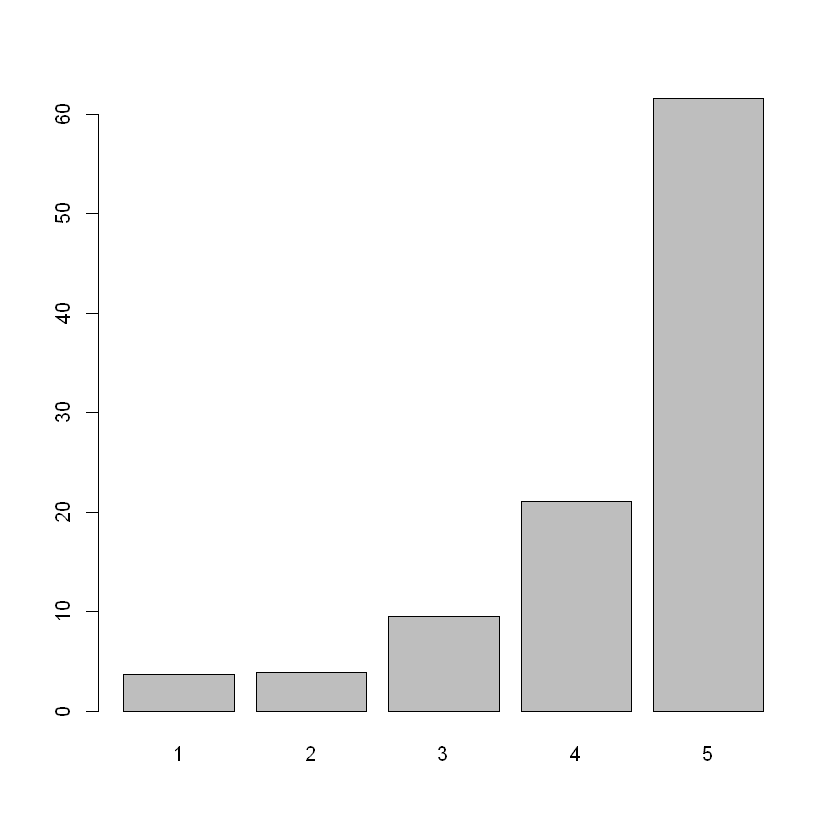

In [74]:
barplot(table_freq , names.arg = names(table_freq))

## barplot(as.vector(table_freq) , names.arg = names(table_freq))

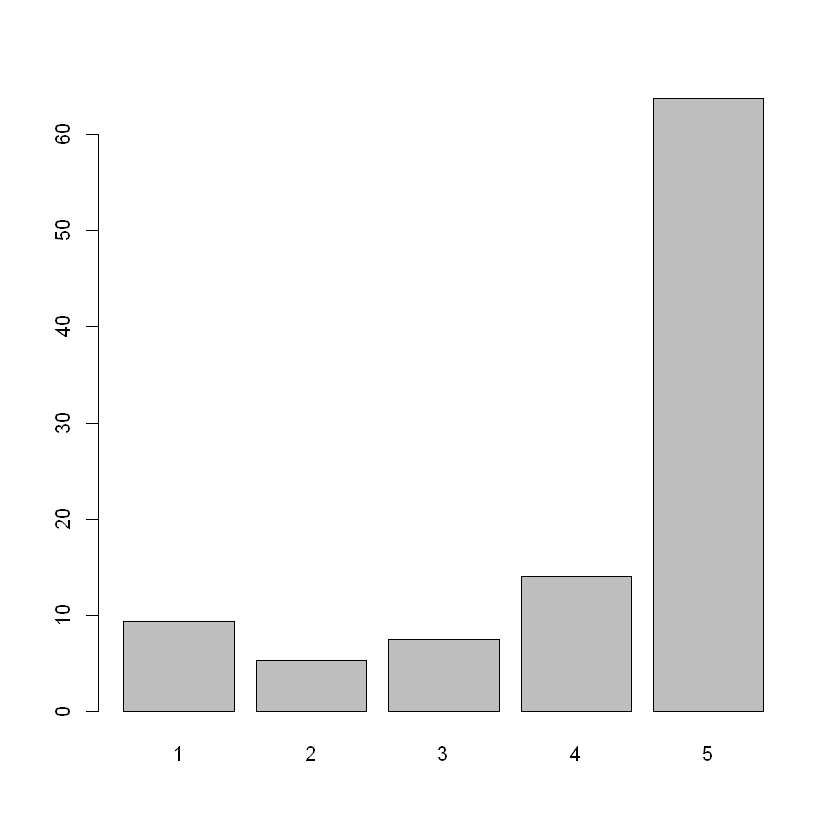

In [75]:
barplot(table_not_freq , names.arg = names(table_not_freq))

## 6.. Are frequent users more verbose ?  (ie someone who speaks or post alot ?

In [49]:
names(data)

[1] "Id"                     "ProductId"              "UserId"                
 [4] "ProfileName"            "HelpfulnessNumerator"   "HelpfulnessDenominator"
 [7] "Score"                  "Time"                   "Summary"               
[10] "Text"                   "viewer_type"

In [91]:
data[ , c("Id" , "UserId" , "ProductId" , "Text")]  ## data[rows , cols ]

Id,UserId,ProductId,Text
<int>,<chr>,<chr>,<chr>
1,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,A1D87F6ZCVE5NK,B00813GRG4,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
3,ABXLMWJIXXAIN,B000LQOCH0,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
4,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
5,A1UQRSCLF8GW1T,B006K2ZZ7K,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
6,ADT0SRK1MGOEU,B006K2ZZ7K,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat."
7,A1SP2KVKFXXRU1,B006K2ZZ7K,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!"
8,A3JRGQVEQN31IQ,B006K2ZZ7K,This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
9,A1MZYO9TZK0BBI,B000E7L2R4,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too


In [19]:
text = data$Text[1]

In [20]:
text

[1] "I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most."

In [31]:
help(strsplit)

## Split the Elements of a Character Vector

In [ ]:
"

strsplit(x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE)

"




"

x: This is the character vector or string that you want to split into substrings.

split: This argument specifies the delimiter pattern used to split the strings


fixed: This is a logical argument. If set to TRUE, split will be treated as a string to split on literal matches only. 
        If FALSE, split will be treated as a regular expression pattern..


perl: This is another logical argument. If set to TRUE, the split argument will be treated as a Perl-style regular expression. 
        This argument is ignored if fixed is TRUE..


"

In [11]:
args(strsplit)

function (x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE) 
NULL

In [21]:
strsplit(text , ' ')

## strsplit() is a base-R function
#### it is a list , as key is 1 & for 1 key , we have various character(string) data

[[1]]
 [1] "I"           "have"        "bought"      "several"     "of"         
 [6] "the"         "Vitality"    "canned"      "dog"         "food"       
[11] "products"    "and"         "have"        "found"       "them"       
[16] "all"         "to"          "be"          "of"          "good"       
[21] "quality."    "The"         "product"     "looks"       "more"       
[26] "like"        "a"           "stew"        "than"        "a"          
[31] "processed"   "meat"        "and"         "it"          "smells"     
[36] "better."     "My"          "Labrador"    "is"          "finicky"    
[41] "and"         "she"         "appreciates" "this"        "product"    
[46] "better"      "than"        ""            "most."

In [22]:
lengths(strsplit(text , ' '))

[1] 49

In [26]:
calculate_length = function(text)
{
    return (lengths(strsplit(text , ' ')))
}

In [ ]:
help(apply)

## Returns a vector or array or list of values obtained by applying a function to an array or matrix.

In [ ]:
## Syntax : apply(X, MARGIN, FUN)

## If the margin is 1 function is applied across row , 
## if the margin is 2 it is applied across the column

    apply() is used when we want to apply a function to the rows or columns of a data frame.. 
    It cannot be applied on lists or vectors..

    Single bracket [ ] = returns output in dataframe
    Double bracket [[ ]] = returns output in vector 
    Dollar Sign"$" = returns output in vector

In [ ]:
class(data$Text)  ## ie its a character vector 

In [ ]:
class(data[['Text']])  ## ie its a character vector 

In [ ]:
class(data['Text']) ## ## ie its a dataframe , ie  now we can pass this data to apply() function it is a data-frame ..

In [27]:
data['Text_length'] = apply(data['Text'] , 2 , calculate_length)

## takes 10- 20 sec(NEW PC)
## takes 1 min (OLD PC)

In [ ]:
## as apply() takes dataframe as i/p , hence we have to mention as data["Text"]..

### apply() is used when we want to apply a function to the rows or columns of a data frame.. 
### It cannot be applied on lists or vectors.. ie we use apply(data$Text , 2 , calculate_length)
### this will return an error

In [52]:
head(data , 2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dttm>,<chr>,<chr>,<chr>,"<int[,1]>"
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Not Frequent,49
2,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not Frequent,31


In [53]:
freq_data = data[data['viewer_type']=="Frequent" , ]  ## data[rows , cols ]
not_freq_data = data[data['viewer_type']=="Not Frequent" , ]

In [54]:
dim(freq_data)

[1] 5560   12

In [12]:
args(par)

## par() : function in R that is used to set various graphical parameters for plotting..

function (..., no.readonly = FALSE) 
NULL

        ... : This ellipsis notation (...) allows you to pass a multiple arguments to the par function..
              It means you can include various parameters depending on what you want to perform..

In [2]:
help(boxplot)

## Produce box-and-whisker plot(s) 

In [ ]:
"

boxplot(x, ...)

## S3 method for class 'formula'
boxplot(formula, data = NULL, ..., subset, na.action = NULL,
        xlab = mklab(y_var = horizontal),
        ylab = mklab(y_var =!horizontal),
        add = FALSE, ann = !add, horizontal = FALSE,
        drop = FALSE, sep = ".", lex.order = FALSE)

## Default S3 method:
boxplot(x, ..., range = 1.5, width = NULL, varwidth = FALSE,
        notch = FALSE, outline = TRUE, names, plot = TRUE,
        border = par("fg"), col = "lightgray", log = "",
        pars = list(boxwex = 0.8, staplewex = 0.5, outwex = 0.5),
         ann = !add, horizontal = FALSE, add = FALSE, at = NULL)



"

In [1]:
args(boxplot)

function (x, ...) 
NULL

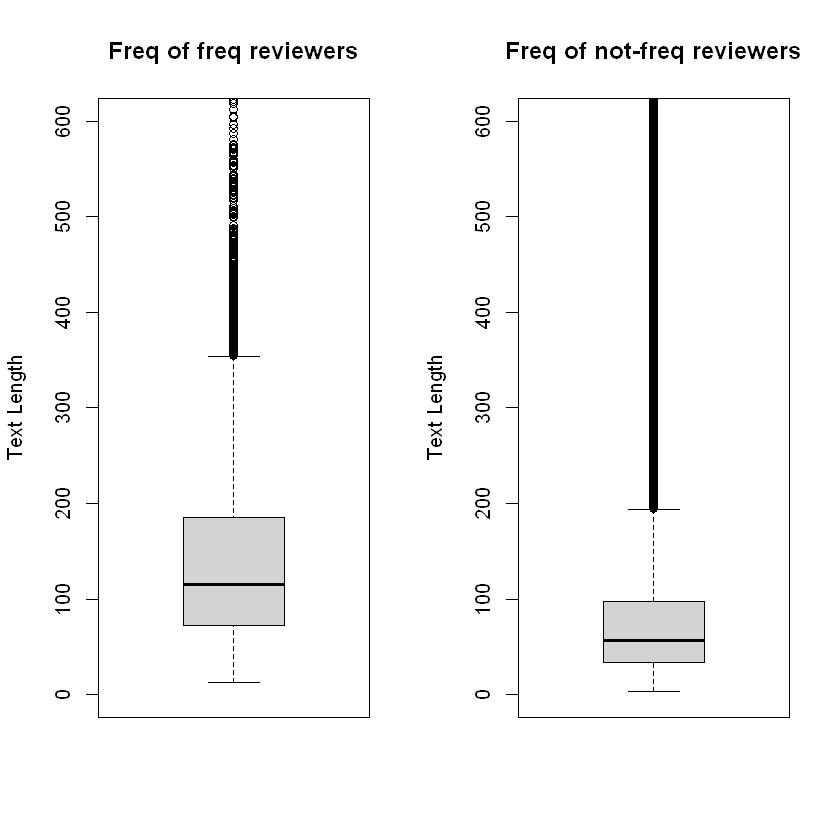

In [106]:
# Create a figure with two subplots
par(mfrow = c(1, 2))

# Plot the first boxplot on the left
boxplot(freq_data$Text_length, main = 'Freq of freq reviewers', ylab = 'Text Length', ylim = c(0, 600))

# Plot the second boxplot on the right
boxplot(not_freq_data$Text_length, main = 'Freq of not-freq reviewers', ylab = 'Text Length', ylim = c(0, 600))


In [ ]:
"

When you execute :

par(mfrow = c(1, 2))

par() : function in R that is used to set various graphical parameters for plotting.
mfrow : It stands for "multiple figures in a row," and it controls the arrangement of plots.


R will create a layout/subplots with 1 rows and 2 columns 
and subsequent plots that you create using functions like plot() or hist() will be arranged in this grid..
Each plot will take up one of the 2 subplots in the grid



"

In [ ]:
'''

 boxplot basically gives us 25th percentile , 50th percentile(median) , 75th percentile & 
 whiskers may be defined in different ways in different tools & packages..

sometimes it shows 99th percentile & 1 percentile value for different package 
sometimes it shows min & max value for different package ..


'''

In [ ]:
'''
Conclusion : 

The distributions of word counts for frequent and infrequent reviews shows that 
infrequent reviewers have a large amount of reviews of low word count.
On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. 



'''

## 7.. sentiment analysis ! 

#### What is sentiment analysis?
    Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
    Some examples of applications for sentiment analysis include:

    1. Analyzing the social media discussion around a certain topic
    2. Evaluating survey responses
    3. Determining whether product reviews are positive or negative

    Sentiment analysis is not perfect.It also cannot tell you why a writer is feeling a certain way. However, it can be 
    useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot 
    analyze it. For this project,the goal is to to classify Food reviews based on customers' text.

In [55]:
dim(data)

[1] 393931     12

In [ ]:
## Since its a huge data having 0.4M rows ,
## so for those of you who dont have good specifications , considering sample of data is a good option !

In [240]:
data_sample = data[1:1000 , ] ## comments[rows , cols]

In [111]:
dim(data_sample)

[1] 1000   12

### In R, u can perform sentiment analysis using below packages :
    
    textBlob                         (not working in R 4.1.3)
    tm(text-mining) , quanteda       (not working in R 4.1.3)
    
    sentimentr
    syuzhet
    
    
    Python textblob

### using sentimentr package !

In [ ]:
# install.packages("sentimentr")

In [33]:
library(sentimentr)

In [ ]:
## data$Summary
## this code takes alot of time , as it is quite a huge data , hence it is good to consider sample

In [112]:
data_sample$Summary[1]

[1] "Good Quality Dog Food"

In [113]:
data_sample$Summary[8]

[1] "Wonderful, tasty taffy"

In [101]:
ls("package:sentimentr") ## to check all the functions inside any package !

### make sure that package is already installed & loaded as well !

[1] "as_key"                           "available_data"                  
 [3] "average_downweighted_zero"        "average_mean"                    
 [5] "average_weighted_mixed_sentiment" "combine_data"                    
 [7] "course_evaluations"               "crowdflower_deflategate"         
 [9] "crowdflower_products"             "crowdflower_self_driving_cars"   
[11] "crowdflower_weather"              "emotion"                         
[13] "emotion_by"                       "extract_emotion_terms"           
[15] "extract_profanity_terms"          "extract_sentiment_terms"         
[17] "general_rescale"                  "get_sentences"                   
[19] "get_sentences2"                   "highlight"                       
[21] "hotel_reviews"                    "hu_liu_apex_reviews"             
[23] "hu_liu_cannon_reviews"            "hu_liu_jukebox_reviews"          
[25] "hu_liu_nikon_reviews"             "hu_liu_nokia_reviews"            
[27] "is_key"                           "kaggle_movie_reviews"            
[29] "kotzias_reviews_amazon_cells"     "kotzias_reviews_imdb"            
[31] "kotzias_reviews_yelp"             "nyt_articles"                    
[33] "presidential_debates_2012"        "profanity"                       
[35] "profanity_by"                     "replace_emoji"                   
[37] "replace_emoji_identifier"         "replace_emoticon"                
[39] "replace_grade"                    "replace_internet_slang"          
[41] "replace_rating"                   "replace_word_elongation"         
[43] "sam_i_am"                         "sentiment"                       
[45] "sentiment_attributes"             "sentiment_by"                    
[47] "sentimentr_data"                  "uncombine"                       
[49] "update_key"                       "update_polarity_table"           
[51] "update_valence_shifter_table"     "validate_sentiment"

In [35]:
help(sentiment_by)

### Polarity Score

In [14]:
args(sentimentr :: sentiment_by)

function (text.var, by = NULL, averaging.function = sentimentr::average_downweighted_zero, 
    group.names, ...) 
NULL

    
    text.var = This is the variable (column) containing the text data for which sentiment analysis will be performed..
    
    by: This argument specifies the variable or variables by which to aggregate the sentiment scores.
    

In [114]:
sentimentr :: sentiment_by(data_sample$Summary[1])

,element_id,word_count,sd,ave_sentiment
,<int>,<int>,<dbl>,<dbl>
1,1,4,NA,1.075


In [115]:
sentimentr :: sentiment_by(data_sample$Summary[1])$ave_sentiment

[1] 1.075

In [116]:
data_sample$Summary[1:10]

[1] "Good Quality Dog Food"                        
 [2] "Not as Advertised"                            
 [3] "\"Delight\" says it all"                      
 [4] "Cough Medicine"                               
 [5] "Great taffy"                                  
 [6] "Nice Taffy"                                   
 [7] "Great!  Just as good as the expensive brands!"
 [8] "Wonderful, tasty taffy"                       
 [9] "Yay Barley"                                   
[10] "Healthy Dog Food"

In [117]:
data_sample$Summary[7]

[1] "Great!  Just as good as the expensive brands!"

In [118]:
sentimentr :: sentiment_by(data_sample$Summary[7])

,element_id,word_count,sd,ave_sentiment
,<int>,<int>,<dbl>,<dbl>
1,1,8,0.2199228,0.3444911


In [119]:
sentimentr :: sentiment_by(data_sample$Summary[7])$ave_sentiment

[1] 0.3444911

In [37]:
help(append)

## Add elements to a vector..

In [ ]:
"

x : vector to which you want to add elements..

values : This argument represents the values that you want to append to the vector .
         It can be a single value, a vector, or a list of values.

"

In [36]:
args(append)

function (x, values, after = length(x)) 
NULL

In [120]:
dim(data_sample)

[1] 1000   12

In [239]:
## New PC : 

## takes 35-40 sec for 1000 obs of comments dataframe
## takes 2.85 mins for 5000 obs of comments dataframe
## takes 23.43 mins for 10000 obs of comments dataframe


start_time = Sys.time()
all_polarity = vector()  # Create an empty vector to store polarity scores

# Loop through each comment
for (each_summary in data_sample$Summary)
{
  tryCatch(
      {
        polar = sentimentr :: sentiment_by(each_summary) $ ave_sentiment
        all_polarity = append(all_polarity , polar) ## append(vector , item)

      }, error = function(e)
      {
        all_polarity = append(all_polarity , 0)   # Handle exceptions by setting polarity to 0
      }
          )
}


end_time = Sys.time()
time_taken = round(end_time - start_time , 2)
time_taken

## in your case,  this time diff will be slightly different as per your system specifications , resources & other factors..
## in case of Google Colab , this time diff will be low as Google Colab typically uses GPU & TPU to execute code..

Time difference of 23.43 mins

In [122]:
length(all_polarity)

[1] 1000

In [123]:
data_sample$polarity = all_polarity

In [124]:
head(data_sample , 2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dttm>,<chr>,<chr>,<chr>,"<int[,1]>",<dbl>
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Not Frequent,49,1.075
2,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not Frequent,31,0.000


In [ ]:
## analyse most frequent -ve & +ve keywords
## so lets filter out both dataframes (+ve polarity dataframes & -ve polarity dataframes)

In [125]:
sample_negative = data_sample[data_sample$polarity < 0 , ]  ## data[rows , cols ]

sample_positive = data_sample[data_sample$polarity > 0 , ]  ## data[rows , cols ]

In [126]:
dim(sample_negative)

### in case of 1k sample : (149 , 13)
### in case of 5k sample : (745 , 13)

[1] 149  13

In [127]:
dim(sample_positive)

### in case of 1k sample : (649 , 12)
### in case of 5k sample : (3241 , 12)

[1] 649  13

## 8.. Doing text cleaning !
       removal of urls , punctuations etc 
       
       
       Imagine we need to find what are those key-words(Amazing , awesome , bad , disgusting) 
       ->> or pair of 2 words eg (nice coffee , affordable gadget , best phone , green tea , dark choclate) 
       ->> or pair of 3 words eg (highly recommended item , most expensive TV) 
       
       that are being extremely used by Users of Amazon while posting comment for Amazon product 
       they bought , so that we are able to understand intent or behaviour of Customers..
       
       But first & foremost we need to clean Text feature !
       

### Steps to pre-process/Clean Text feature :-->> 
    a.. applying Lower-case operation on data !
    b.. removal of hyperlinks from data
    c.. dealing with contractions (if available)
    d.. removing special characters from data or punctuations from data
    
    e.. removal of stopwords

In [ ]:
## lets Pick "Text" to perform in-depth analysis , as "Text" features in detail review..

In [28]:
sample = data[1:50000 , ] ## comments[rows , cols]

In [29]:
dim(sample)

[1] 50000    12

#### a.. applying Lower-case operation on data !

In [158]:
sample$Text[2]

[1] "Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as \"Jumbo\"."

In [ ]:
### there will be some reviews written by user in which they have used lower-case "jumbo" instead of Title-case "Jumbo"..
### but technically both are same , so lets make both on same scale ..

In [39]:
help(tolower)

### Translate characters in character vectors, in particular from upper to lower case

In [ ]:
"

tolower(x)

x : a character vector

"

In [38]:
args(tolower)


## x : character vector

function (x) 
NULL

In [30]:
sample$Text = tolower(sample$Text) ## takes 2 sec 

#### b.. removal of hyperlinks from data

#### lets check how many rows have 'hyperlinks' ..
     A Hyperlink could have href , https , https , www or anchor tag..
     
     anchor tag : <a href="http://www....   </a>

In [40]:
help(grepl)

## Pattern Matching and Replacement

In [ ]:
"

grepl(pattern, x, ignore.case = FALSE, perl = FALSE,
      fixed = FALSE, useBytes = FALSE)




pattern : The pattern or regular expression that you want to search for within the character vector "x"

x : The character vector in which you want to search for the pattern..

ignore.case : A logical value indicating whether to ignore the case when matching the pattern. 
              If TRUE, the matching is case-insensitive; if FALSE, it is case-sensitive.



"

In [41]:
args(grepl)

## return logical vector output..

function (pattern, x, ignore.case = FALSE, perl = FALSE, fixed = FALSE, 
    useBytes = FALSE) 
NULL

In [31]:
sum(grepl("http" , sample$Text))

## takes 2-5 sec (NEW PC)
## takes 2-5 sec (OLD PC)

[1] 1024

In [32]:
sum(grepl("https", sample$Text))

## takes 0-1 sec (NEW PC)
## takes 2-5 sec (OLD PC) 

[1] 0

In [33]:
sum(grepl("www", sample$Text))

## takes 2-5 sec (NEW PC)
## takes 2-5 sec (OLD PC)

[1] 1051

In [34]:
sum(grepl("href", sample$Text))

## takes 0-1 sec (NEW PC)
## takes 2-5 sec (OLD PC)

[1] 984

In [203]:
pattern = "<a.*?>"
sum(grepl(pattern, sample$Text))

## takes 2-5 sec 

## <.*?</a> -- inside anchor tags , we can have any number of characters..

## >>   .-any char except new line
## >>   *- 0 or more occurences of above ie ( it matches 0 or more occurences of any char except newline  )
## >>   ?(Quantifier)- 0 or 1

[1] 984

In [35]:
sum(grepl('http|www|href|https|<a.*?</a>', sample$Text))

## re pattern http|www|href|https|<a.*?</a> is used to match any string that contains :
## "http," "www," "href," "https," or any content enclosed within <a> and </a> tags.. often known as anchor tags

## takes 2-5 sec 

[1] 1053

In [ ]:
'''

we have observed as we have 1053 rows which have URLs or have https|http that is definitely a kind of Dirtines in data, 
so we have to clean this data & make it ready data for further analysis ..

'''

In [ ]:

sample[grepl("http|www|href|https|<a.*?</a>", sample$Text), ]  ## sample[rows , cols]

## sample[grepl("http|www|href|https|<a.*?</a>", sample$Text, perl = TRUE), ]
## The perl = TRUE argument allows us to use Perl-compatible regular expressions.


## executing it will be increase notebook size by 1.1 MB !

In [162]:
sample$Text[22]

[1] "I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href=\"http://www.amazon.com/gp/product/B001GVISJM\">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>"

In [ ]:
### now wherever above pattern matches , lets replace it with "" (blank string)

In [42]:
help(gsub)

## Pattern Matching and Replacement
## It stands for "Global substitution(gsub)

In [ ]:
"

gsub(pattern, replacement, x, ignore.case = FALSE, perl = FALSE,
     fixed = FALSE, useBytes = FALSE)


pattern: This is the pattern you want to search for within the string.

replacement: This is the string that will replace the matched occurrences of the pattern..

x: This is the input string (or vector of strings) in which replacements are to be made..

ignore.case: A logical value. If TRUE, it ignores case when matching patterns.

fixed: A logical value. If TRUE, pattern is treated as a string literal instead of a regular expression.

perl: A logical value. If TRUE, uses Perl-compatible regular expressions.

"

In [16]:
args(gsub)

function (pattern, replacement, x, ignore.case = FALSE, perl = FALSE, 
    fixed = FALSE, useBytes = FALSE) 
NULL

In [163]:
# Remove everything from "http" 
gsub("http\\S+", "", sample$Text[22])

## \\S+: \\S matches any non-whitespace character(ie any character that's not a whitespace).. The + quantifier means one or more occurrences.
## ie where-ever this pattern got matches , replace it with ""
## but not able to properly clean it !

[1] "I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href=\" Strawberry, 16-Ounce Bags (Pack of 6)</a>"


     But A Hyperlink could have href , https , https , www or anchor tag..
     
     anchor tag : <a href="http://www....   </a>

In [ ]:
### so lets define a pattern that can hold all these pattern ...

##### HTML tag !
    <--opening of HTML tags , ie <a = opening of anchor tag
    >-Closing of html tags  , ie </a> = closing of anchor tag
    
    <.*?</a> -- inside HTML tags , we can have any number of characters..

    >>   .-any char except new line
    >>   *- 0 or more occurences of above ie ( it matches 0 or more occurences of any char except newline  )
    >>   ?(Quantifier)- 0 or 1
    
     use of ? quantifier->> either it is present or absent (as we can have both the scenarios in data )
        Scenario 1:<a href="http://www.amazon.com </a>
                    Here, the .*? part matches the href="http://www.amazon.com"
                    
        Scenario 2:<a </a>
                    Here, the .*? part matches nothing (0 characters), which is still valid because of the * quantifier
            
        Thats why we have to use this '?' quantifier to handle both the scenario..

In [210]:
# Load the 'stringr' package if not already loaded
# install.packages("stringr") # Uncomment to install the package
library(stringr)

# Replace URLs, href, and <a> tags with an empty string in 'sample$Text[22]'
gsub("http\\S+|https\\S+|www\\S+|href\\S+|<a.*</a>", "", sample$Text[22])


[1] "I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. "

In [36]:
remove_hyperlinks = function(text) 
{
  cleaned_text = gsub("http\\S+|https\\S+|www\\S+|href\\S+|<a.*</a>", "", text, perl = TRUE)
  return(cleaned_text)
}

## The perl = TRUE argument allows us to use Perl-compatible regular expressions.


In [ ]:
help(cat)

## Concatenate and Print

In [1]:
args(cat)

## cat() is a base-R function() ..
        
## we can perform concatenation using cat() function with the help of which we can perform character-wise concatenation 
## The cat() is used for concatenating and printing multiple values

function (..., file = "", sep = " ", fill = FALSE, labels = NULL, 
    append = FALSE) 
NULL

In [37]:

# Example usage:
text = "This is a sample text with a link: <a href='http://example.com'>Click here</a>"
cleaned_text <- remove_hyperlinks(text)
cat(cleaned_text)


This is a sample text with a link: 

In [43]:
help(apply)

## Returns a vector or array or list of values obtained by applying a function to an array or matrix.

In [215]:
args(apply)

function (X, MARGIN, FUN, ..., simplify = TRUE) 
NULL

In [ ]:
## Syntax : apply(X, MARGIN, FUN)

## If the margin is 1 function is applied across row , 
## if the margin is 2 it is applied across the column

    apply() is used when we want to apply a function to the rows or columns of a data frame.. 
    It cannot be applied on lists or vectors..

    Single bracket [ ] = returns output in dataframe
    Double bracket [[ ]] = returns output in vector 
    Dollar Sign"$" = returns output in vector

In [ ]:
class(sample$Text) ## ie its a character vector 

In [ ]:
class(sample[['Text']]) ## ie it is also a character vector 

In [ ]:
class(sample['Text']) ## ie its a dataframe

In [38]:
lapply(sample$Text[1:5] , remove_hyperlinks)

[[1]]
[1] "i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most."

[[2]]
[1] "product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as \"jumbo\"."

[[3]]
[1] "this is a confection that has been around a few centuries.  it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar.  and it is a tiny mouthful of heaven.  not too chewy, and very flavorful.  i highly recommend this yummy treat.  if you are familiar with the story of c.s. lewis' \"the lion, the witch, and the wardrobe\" - this is the treat that seduces edmund into selling out his brother and sisters to the witch."

[[4]]
[1] "if you are looking for the secret ingredient in robitussin i believe i have found it.  i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda.  the flavor is very medicinal."

[[5]]
[1] "great taffy at a great price.  there was a wide assortment of yummy taffy.  delivery was very quick.  if your a taffy lover, this is a deal."

In [232]:
sample[1 , 'Text']

[1] "I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most."

In [168]:
sample[1:2 , ]['Text']

## head(sample['Text'] , 2)

,Text
,<chr>
1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."


In [167]:
apply(sample[1:2 , ]['Text'] , 1 , FUN = remove_hyperlinks)

1 
"I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most." 
                                                                                                                                                                                                                                                                        2 
                                                                       "Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as \"Jumbo\"."

In [170]:
dim(sample)

[1] 50000    12

In [39]:
sample['Text'] = apply(sample['Text'], 1 , FUN = remove_hyperlinks)

## takes around 5-10 secs if we use apply()

In [ ]:
## as apply() takes dataframe as i/p , hence we have to mention as sample['Text']..

### apply() is used when we want to apply a function to the rows or columns of a data frame.. 
### It cannot be applied on lists or vectors.. ie we use apply(sample$Text , 1 , remove_hyperlinks)
### this will return an error

In [ ]:
## sample$Text = sapply(sample$Text, remove_hyperlinks)

## takes 5-10 sec

In [40]:
sample$Text[1:5]

[1] "i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most."                                                                                                                                                                                                                                                        
[2] "product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as \"jumbo\"."                                                                                                                                                                                                                                                                                                                               
[3] "this is a confection that has been around a few centuries.  it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar.  and it is a tiny mouthful of heaven.  not too chewy, and very flavorful.  i highly recommend this yummy treat.  if you are familiar with the story of c.s. lewis' \"the lion, the witch, and the wardrobe\" - this is the treat that seduces edmund into selling out his brother and sisters to the witch."
[4] "if you are looking for the secret ingredient in robitussin i believe i have found it.  i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda.  the flavor is very medicinal."                                                                                                                                                                                                                                                                                                    
[5] "great taffy at a great price.  there was a wide assortment of yummy taffy.  delivery was very quick.  if your a taffy lover, this is a deal."

In [41]:
sample$Text[22]

[1] "i bought these for my husband who is currently overseas. he loves these, and apparently his staff likes them also.<br />there are generous amounts of twizzlers in each 16-ounce bag, and this was well worth the price. "

In [ ]:
"

library(dplyr)

sample <- sample %>% 
  mutate(Text = sapply(Text, remove_hyperlinks))


"

## 9.. Doing more cleaning !  
      Working with Contractions , Punctuations , removal of Stopwords !

#### c.. dealing with contractions (if available)

In [ ]:
#### since we remove URLs , lets fix some other problems : lets talk about Contractions in English lang..

### The English language has a couple of contractions. For instance:

    you've -> you have
    he's -> he is
    
    These can sometimes cause headache when you are doing natural language processing.
    
    As there are lots of contractions , so lets try to talk with respect to most used contractions

#### For contractions
https://stackoverflow.com/a/47091490/4084039 

In [184]:
sample$Text[29]


## below are the contractions available in my below text !
# \'re = are
# \'ll = will
# \'s = is 

[1] "i got this for my mum who is not diabetic but needs to watch her sugar intake, and my father who simply chooses to limit unnecessary sugar intake - she's the one with the sweet tooth - they both loved these toffees, you would never guess that they're sugar-free and it's so great that you can eat them pretty much guilt free!  i was so impressed that i've ordered some for myself (w dark chocolate) to take to the office so i'll eat them instead of snacking on sugary sweets.<br />these are just excellent!"

In [45]:
help(grepl)

## Pattern Matching and Replacement

In [ ]:
"

grepl(pattern, x, ignore.case = FALSE, perl = FALSE,
      fixed = FALSE, useBytes = FALSE)




pattern : The pattern or regular expression that you want to search for within the character vector

x : The character vector in which you want to search for the pattern..

ignore.case : A logical value indicating whether to ignore the case when matching the pattern. 
              If TRUE, the matching is case-insensitive; if FALSE, it is case-sensitive.



"

In [185]:
sum(grepl("\\'ll", sample$Text)) ## takes 2-5 sec 

[1] 2630

In [186]:
sum(grepl("won't", sample$Text)) ## takes 2-5 sec 

[1] 1497

In [70]:
sum(grepl("can\'t", sample$Text)) ## takes 2-5 sec 

[1] 3034

In [ ]:
sample[grepl("\\'ll", sample$Text), ] ## takes 2-5 sec 

In [ ]:
### There is no standard package in R specifically for contraction replacement like in Python. 
### You would need to create a custom function or use regular expressions to replace contractions.

In [ ]:
help(gsub)

In [ ]:
"

gsub(pattern, replacement, x, ignore.case = FALSE, perl = FALSE,
     fixed = FALSE, useBytes = FALSE)


pattern: This is the pattern you want to search for within the string.

replacement: This is the string that will replace the matched occurrences of the pattern..

x: This is the input string (or vector of strings) in which replacements are to be made..

ignore.case: A logical value. If TRUE, it ignores case when matching patterns..

fixed : A logical value. 
        If TRUE, pattern is treated as a string literal instead of a regular expression.

perl : A logical value. 
        If TRUE, uses Perl-compatible regular expressions.

"

In [187]:
args(gsub)

function (pattern, replacement, x, ignore.case = FALSE, perl = FALSE, 
    fixed = FALSE, useBytes = FALSE) 
NULL

In [42]:
# Custom contraction replacement function
replace_contractions = function(text) 
{
  text = gsub("you've", "you have", text)
  return (text)
}


In [189]:
text = "you've done a good job "
gsub("you've", "you have", text) 

[1] "you have done a good job "

In [ ]:
### there are 100s or 1000's of contractions , but lets consider most frequent one which we use in day-2-day !

In [45]:
# create a list of contractions and their corresponding expanded forms

contractions = list(
    "can't" = "cannot",
    "could've" = "could have",
    "couldn't" = "could not",
    "didn't" = "did not",
    "doesn't" = "does not",
    "don't" = "do not",
    "haven't" = "have not",
    "I'll" = "I will",
    "I've" = "I have",
    "isn't" = "is not",
    "it's" = "it is",
    "let's" = "let us",

    "shouldn't" = "should not",
    "that's" = "that is",
    "they'll" = "they will",
    "they've" = "they have",
    "we'll" = "we will",
    "we've" = "we have",
    
    "would've" = "would have",
    "you'll" = "you will",
    "you're" = "you are",
    "you've" = "you have"
)

In [132]:
names(contractions)

[1] "can't"     "could've"  "couldn't"  "didn't"    "doesn't"   "don't"    
 [7] "haven't"   "I'll"      "I've"      "isn't"     "it's"      "let's"    
[13] "shouldn't" "that's"    "they'll"   "they've"   "we'll"     "we've"    
[19] "would've"  "you'll"    "you're"    "you've"

In [133]:
contractions["you've"]

$`you've`
[1] "you have"

In [134]:
class(contractions)

## typeof(contractions)

[1] "list"

In [43]:
# Custom function to remove contractions from text

remove_contractions = function(text) 
{
  # Replace contractions with their expanded forms
  for (contract in names(contractions)) 
  {
    text = gsub(contract , contractions[contract] , text , ignore.case = TRUE)
  }

  return(text)
}


In [46]:
# Test the function
text = "I've always thought it's a great day , isn't it ?"
remove_contractions(text)

[1] "I have always thought it is a great day, is not it?"

In [194]:
sample$Text[29]

### it has contraction as i\'ve , i\'ll !

[1] "i got this for my mum who is not diabetic but needs to watch her sugar intake, and my father who simply chooses to limit unnecessary sugar intake - she's the one with the sweet tooth - they both loved these toffees, you would never guess that they're sugar-free and it's so great that you can eat them pretty much guilt free!  i was so impressed that i've ordered some for myself (w dark chocolate) to take to the office so i'll eat them instead of snacking on sugary sweets.<br />these are just excellent!"

In [47]:
remove_contractions(sample$Text[29])

[1] "i got this for my mum who is not diabetic but needs to watch her sugar intake, and my father who simply chooses to limit unnecessary sugar intake - she's the one with the sweet tooth - they both loved these toffees, you would never guess that they're sugar-free and it is so great that you can eat them pretty much guilt free!  i was so impressed that I have ordered some for myself (w dark chocolate) to take to the office so I will eat them instead of snacking on sugary sweets.<br />these are just excellent!"

In [ ]:
### as we have used apply() multiple times specially in the previous tut (8th) to remove hyperlinks !

## so this time lets use sapply() to do same task !

In [51]:
## apply(sample[1:2 , ]['Text'] , 1  , remove_contractions)

1 
"i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most." 
                                                                                                                                                                                                                                                                        2 
                                                                       "product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as \"jumbo\"."

In [ ]:
## sample['Text'] = apply(sample['Text'] , 1  , remove_contractions)

In [47]:
help(sapply)

### Apply a Function over a List or Vector

In [46]:
args(sapply)

function (X, FUN, ..., simplify = TRUE, USE.NAMES = TRUE) 
NULL

In [ ]:
## Syntax: sapply( x, function )
## The sapply() takes a list, vector, or data frame as input and gives output in the form of an vector,array or matrix object..

In [ ]:
"
sapply() function accepts a third argument using which we can return the output as a list instead of a vector..
        
Syntax: sapply(List, Operation, simplify = FALSE)
simplify = FALSE: Returns the output as a list instead of a vector

"

In [48]:
start_time = Sys.time()

sample$Text = sapply(sample$Text, remove_contractions)

end_time = Sys.time()
time_taken = round(end_time - start_time , 2 )
time_taken


### takes 15 sec for 50K sample ! (NEW PC)

### takes 3 mins for 50K sample when we are using all_contractions vector in remove_contractions function ! (OLD PC)
### takes 1.3 mins for 50K sample when we are using contractions list in remove_contractions function ! (OLD PC)

Time difference of 14.65 secs

#### d.. removing special characters from data or punctuations from data

In [197]:
sample$Text[8]

[1] "this taffy is so good.  it is very soft and chewy.  the flavors are amazing.  i would definitely recommend you buying it.  very satisfying!!"

In [48]:
args(gsub)

function (pattern, replacement, x, ignore.case = FALSE, perl = FALSE, 
    fixed = FALSE, useBytes = FALSE) 
NULL

In [198]:
gsub("[[:punct:]]", "", sample$Text[8])

### It removes all punctuation characters from the 8th row of the 'Text' column..
### ie wherever ,, this pattern "[[:punct:]]" is found , just replace it with "" in sample$Text[8]

[1] "this taffy is so good  it is very soft and chewy  the flavors are amazing  i would definitely recommend you buying it  very satisfying"

In [52]:
remove_punc = function(text) 
{
  # Define a regular expression to match punctuation characters
  punctuation_pattern = "[[:punct:]]"
  
  # Use gsub to remove punctuation from the string
  no_punct = gsub(punctuation_pattern, "", text)
  
  return(no_punct)
}


In [50]:
remove_punc(sample$Text[8])

[1] "this taffy is so good  it is very soft and chewy  the flavors are amazing  i would definitely recommend you buying it  very satisfying"

In [ ]:
## as we have used apply() multiple times to apply a function , so this time lets use sapply() to apply a func..

In [53]:
start_time = Sys.time()

sample['Text'] = apply(sample['Text'], 1 , remove_punc)
## sample$Text = sapply(sample$Text, remove_punc)

end_time = Sys.time()
time_taken = round(end_time - start_time , 2 )
time_taken

## takes 6 sec for 50K sample(for apply & sapply as well)

### takes 8-9 mins for 50K sample (OLD PC)
### takes 1.3 mins for 10K sample (OLD PC)

Time difference of 7.07 secs

In [54]:
sample$Text[8]

[1] "this taffy is so good  it is very soft and chewy  the flavors are amazing  i would definitely recommend you buying it  very satisfying"

#### e.. Removal of Stopwords !
        Stopwords are the unnecessary words that even if they are removed the sentiment of the sentence dosent change.

In [ ]:
## install.packages("tm") ## text-mining 

In [50]:
library(tm)

In [51]:
args(stopwords)

function (kind = "en") 
NULL

In [52]:
help(stopwords)

## Return various kinds of stopwords with support for different languages.. 

## u can use various stopwords list which are : Romanian , Catalan etc..

In [53]:
stop = tm :: stopwords("en") ## getting all the stopwords which are defined by R developers in stopwords() of tm package..

In [54]:
stop

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [59]:
length(stop) ## ie there are total 174 stopwords which are defined by R developers

[1] 174

In [ ]:
### Imagine we have find out some more stopwords in my data, then we can add it to my stop vector

In [60]:
# Define custom stopwords to add
custom_stopwords = c("", "even" , "just" , "br" , "I")

In [ ]:
"

union(x , y)

x : This is first set on which u want to apply union operation..

y : This is the other set which should be union with the first set..

... : Additional arguments that can be passed..


"

In [55]:
args(union)

### x, y : Pair of compatible data frames.

function (x, y, ...) 
NULL

In [56]:
help(union)

In [61]:
# Combine the default stopwords and custom stopwords
all_stopwords = union(stop, custom_stopwords)

In [62]:
length(all_stopwords)

[1] 179

In [63]:
sample$Text[2]

[1] "product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo"

In [211]:
### make sure that u have all the tokens of above Text so that u are able to deal with Sopwords removal !

In [58]:
help(strsplit)

## Split the Elements of a Character Vector

In [ ]:
"

strsplit(x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE)



x: This is the character vector or string that you want to split into substrings.

split: This argument specifies the delimiter pattern used to split the strings


fixed: This is a logical argument. If set to TRUE, split will be treated as a string to split on literal matches only. 
        If FALSE, split will be treated as a regular expression pattern..


perl: This is another logical argument. If set to TRUE, the split argument will be treated as a Perl-style regular expression. 
        This argument is ignored if fixed is TRUE..


"

In [57]:
args(strsplit)

function (x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE) 
NULL

In [64]:
strsplit(sample$Text[2] , " ")

[[1]]
 [1] "product"    "arrived"    "labeled"    "as"         "jumbo"     
 [6] "salted"     "peanutsthe" "peanuts"    "were"       "actually"  
[11] "small"      "sized"      "unsalted"   "not"        "sure"      
[16] "if"         "this"       "was"        "an"         "error"     
[21] "or"         "if"         "the"        "vendor"     "intended"  
[26] "to"         "represent"  "the"        "product"    "as"        
[31] "jumbo"

In [65]:
unlist(strsplit(sample$Text[2] , " "))

[1] "product"    "arrived"    "labeled"    "as"         "jumbo"     
 [6] "salted"     "peanutsthe" "peanuts"    "were"       "actually"  
[11] "small"      "sized"      "unsalted"   "not"        "sure"      
[16] "if"         "this"       "was"        "an"         "error"     
[21] "or"         "if"         "the"        "vendor"     "intended"  
[26] "to"         "represent"  "the"        "product"    "as"        
[31] "jumbo"

In [66]:
txt = unlist(strsplit(sample$Text[2] , " "))

### why unlist(text) , bcz first we have to make sure that
### both text & stop must be a vector so that we can remove stopwords

In [67]:
class(txt)

[1] "character"

In [179]:
class(all_stopwords)

[1] "character"

In [68]:
txt %in% all_stopwords

### logical vector , where-ever we have TRUE , ie at that index we have a STOPWORD 

[1] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[13] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[25] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE

In [69]:
txt[txt %in% all_stopwords] ## to get all the stopwords in sample$Text[2] 

[1] "as"   "were" "not"  "if"   "this" "was"  "an"   "or"   "if"   "the" 
[11] "to"   "the"  "as"

In [70]:
filtered_words = txt[!txt %in% all_stopwords]

In [71]:
filtered_words ## cleaned words in sample$Text[2]..

[1] "product"    "arrived"    "labeled"    "jumbo"      "salted"    
 [6] "peanutsthe" "peanuts"    "actually"   "small"      "sized"     
[11] "unsalted"   "sure"       "error"      "vendor"     "intended"  
[16] "represent"  "product"    "jumbo"

In [72]:
stopword_removal = function(text) 
{
  txt = unlist(strsplit(text , " "))
  filtered_words = txt[!txt %in% all_stopwords]
  return (filtered_words)
}

In [73]:
stopword_removal(sample$Text[2])

[1] "product"    "arrived"    "labeled"    "jumbo"      "salted"    
 [6] "peanutsthe" "peanuts"    "actually"   "small"      "sized"     
[11] "unsalted"   "sure"       "error"      "vendor"     "intended"  
[16] "represent"  "product"    "jumbo"

In [74]:
stopword_removal(sample$Text[3])

[1] "confection" "around"     "centuries"  "light"      "pillowy"   
 [6] "citrus"     "gelatin"    "nuts"       "case"       "filberts"  
[11] "cut"        "tiny"       "squares"    "liberally"  "coated"    
[16] "powdered"   "sugar"      "tiny"       "mouthful"   "heaven"    
[21] "chewy"      "flavorful"  "highly"     "recommend"  "yummy"     
[26] "treat"      "familiar"   "story"      "cs"         "lewis"     
[31] "lion"       "witch"      "wardrobe"   "treat"      "seduces"   
[36] "edmund"     "selling"    "brother"    "sisters"    "witch"

In [ ]:
"

### apply() & sapply() here doesn't return expected results !
apply(sample[1:2 , ]['Text'] , 1 , stopword_removal)
sapply(sample$Text[1:2] , stopword_removal)

## doesn't return expected results !

"

In [1]:
help(lapply)

## Apply a Function over a List or Vector

In [ ]:
"

lapply(X, FUN, ...)


X : This is the list (or vector) , dataframe on which u want to apply function FUN ..

FUN : This is the function to be applied to each element of the list X..

... : These are additional arguments that can be passed to the lapply as per need..


"

In [ ]:
## Syntax: lapply( x , fun )
## lapply() basically returns O/P as : list
## The lapply() takes a list, vector, or data frame as input and gives output in the form of a list object

In [59]:
args(lapply)

function (X, FUN, ...) 
NULL

In [80]:
lapply(sample$Text[1:2] , stopword_removal)

[[1]]
 [1] "bought"      "several"     "vitality"    "canned"      "dog"        
 [6] "food"        "products"    "found"       "good"        "quality"    
[11] "product"     "looks"       "like"        "stew"        "processed"  
[16] "meat"        "smells"      "better"      "labrador"    "finicky"    
[21] "appreciates" "product"     "better"     

[[2]]
 [1] "product"    "arrived"    "labeled"    "jumbo"      "salted"    
 [6] "peanutsthe" "peanuts"    "actually"   "small"      "sized"     
[11] "unsalted"   "sure"       "error"      "vendor"     "intended"  
[16] "represent"  "product"    "jumbo"

In [242]:
### applying stopword_removal function to every row of "Text" feature

text_clean = lapply(sample$Text , stopword_removal) ## takes 10 sec for 50K sample

In [243]:
text_clean[1]

[[1]]
 [1] "bought"      "several"     "vitality"    "canned"      "dog"        
 [6] "food"        "products"    "found"       "good"        "quality"    
[11] "product"     "looks"       "like"        "stew"        "processed"  
[16] "meat"        "smells"      "better"      "labrador"    "finicky"    
[21] "appreciates" "product"     "better"

## 10.. Performing unigram , bigram , trigram analysis !

In [229]:
class(text_clean)

[1] "list"

In [ ]:
### this text_clean is a list , but we need entire data in the form of 1-D data structure like vector 
### so that we can compute frequency of each word

In [244]:
text_clean[1:2]

[[1]]
 [1] "bought"      "several"     "vitality"    "canned"      "dog"        
 [6] "food"        "products"    "found"       "good"        "quality"    
[11] "product"     "looks"       "like"        "stew"        "processed"  
[16] "meat"        "smells"      "better"      "labrador"    "finicky"    
[21] "appreciates" "product"     "better"     

[[2]]
 [1] "product"    "arrived"    "labeled"    "jumbo"      "salted"    
 [6] "peanutsthe" "peanuts"    "actually"   "small"      "sized"     
[11] "unsalted"   "sure"       "error"      "vendor"     "intended"  
[16] "represent"  "product"    "jumbo"

In [62]:
help(unlist)

## Flatten Lists , ie Given a list structure x, unlist simplifies it to produce a vector

In [61]:
args(unlist)

function (x, recursive = TRUE, use.names = TRUE) 
NULL

In [245]:
# Flatten the list into a vector so that I can compute count of every word very easily !
total_text_1D_vector = unlist(text_clean)

In [246]:
class(total_text_1D_vector)

[1] "character"

In [247]:
length(total_text_1D_vector)

[1] 1989177

#### e) Do plotting
    1..Unigram analysis
    2..Bigram Analysis
    3..Trigram analysis

###### 1..Unigram analysis

In [248]:
# obtain the frequency of individual words in the reviews, for this u can use table()

# Create a frequency distribution using the table() function
word_freq = table(total_text_1D_vector)

In [64]:
help(sort)

## Sorting or Ordering Vectors

In [ ]:
"

sort(x, decreasing = FALSE, ...)


x :: an R object that u want to sort 

"

In [63]:
args(sort)

function (x, decreasing = FALSE, ...) 
NULL

In [249]:
# Sort the frequency distribution in descending order to get the top words
sorted_word_freq = sort(word_freq, decreasing = TRUE)

In [250]:
# Get the top 20 most frequent words
top_20_words = head(sorted_word_freq, 20)

In [251]:
top_20_words

total_text_1D_vector
   like    good     one   taste   great    will product     can  coffee  flavor 
  22172   17324   14879   14773   14360   13679   12779   12265   12206   12160 
    tea    love     get    food  really    much    also  little     use    time 
  11491   10763    9398    9397    8796    8064    7259    7185    7141    7118 

In [ ]:
"

Note : 
if u are getting any frequent keyword as messy , just put that keyword in stopword vector


"

In [ ]:
"
->> Observations
20 most frequent words across customer summary are :   like , good , taste , will , product , coffee , flavor , tea , love 

## but it is not that much clear whether coffee or tea is good or not , 
## similarly what about food whether is is good or bad  or do we have better food products !
## so to come up with meaningful insights , we can think of using Bi-gram analysis..


"

###### b.. Bigram Analysis

In [253]:
length(total_text_1D_vector)

[1] 1989177

In [66]:
help(paste)

## Concatenate Strings

In [65]:
args(paste)

function (..., sep = " ", collapse = NULL, recycle0 = FALSE) 
NULL

In [ ]:
"

... : These are the objects to be concatenated together. 
        You can provide multiple objects separated by commas (x, y, z, etc.).

sep : This is the separator to use between the objects. 
        By default, it is set to a single space " "


"

In [ ]:
### Lets perform Bigram analysis completely from scratch , ie without relying on in-built functions !

### note : There is a higher chance that Picking up adjacent words make sense as it will create meaningful bigrams ,
## similarly , there is a lower chance that picking up any 2 random word doesn't create meaningful bigram !

## so lets consider 2 adjacent words !

In [254]:
start_time = Sys.time()

# Create all possible bigrams from reviews !
all_bigrams = vector()

for (i in 1:(length(total_text_1D_vector) - 1)) 
{
  bigram = paste(total_text_1D_vector[i], total_text_1D_vector[i + 1], sep = " ")
  all_bigrams[[i]] = bigram  ## assigns the bigram at the ith index of the vector all_bigrams. 
    
  ### all_bigrams = append(all_bigrams, bigram)
  ### all_bigrams <- c(all_bigrams, bigram)
}


end_time = Sys.time()

print(end_time - start_time)

## takes 37 sec - 2 min 

Time difference of 42.63423 secs


In [255]:
# Getting the bigram frequency distribution

bigrams_freq = table(all_bigrams) ## takes 20-30 sec 

In [256]:
head(sort(bigrams_freq , decreasing = TRUE) , 50)

all_bigrams
      taste like highly recommend   dark chocolate    peanut butter 
            1307             1256             1115             1084 
   grocery store      tastes like        green tea      much better 
            1077             1020             1000              982 
     gluten free         dog food      really good      really like 
             960              869              850              828 
         can get    great product       taste good       cup coffee 
             788              770              746              715 
      first time    coconut water         year old         cat food 
             704              665              658              645 
         im sure      pretty good     tastes great   subscribe save 
             621              614              605              597 
       years ago      taste great        hard find        long time 
             575              555              549              544 
        will buy      

    Observations
    We have some new insights! Food items/packed items mentioned in the top 20 bigrams are :
    
    a) Dark choclate 
    b) peanut butter
    c) Green tea  
    d) gluten free  
    e) dog food  
    f) coconut water 
    g) cat food 
    
    
    ie these are some of the food or services where Amazon can focus more , 
       Amazon can add more stocks with related to these item & 
       would focus more on adding more qualitative products with respect to these categories to maximize revenue  ..
       
       
    Note : Since we are working on sample of data , for whole data , u might end up getting more interesting results ..
    
        "Gluten free" doesn't make more sense bcz it could be either gluten free wheat , gluten free products , etc ..
        so lets Perform trigram analysis

##### c.. Trigram Analysis

In [257]:
start_time = Sys.time()

# Create all possible trigrams from the reviews
all_trigrams = vector()

for (i in 1:(length(total_text_1D_vector) - 2)) 
{
  trigram = paste(total_text_1D_vector[i], total_text_1D_vector[i + 1], total_text_1D_vector[i + 2] ,  sep = " ")
  all_trigrams[[i]] = trigram
}


end_time = Sys.time()

print(end_time - start_time)

### takes 45 sec 

Time difference of 48.14657 secs


In [258]:
# Getting the trigram frequency distribution

trigrams_freq = table(all_trigrams) ## takes 1 min

In [261]:
head(sort(trigrams_freq , decreasing = TRUE) , 50)

all_trigrams
     local grocery store             shake n bake highly recommend product 
                     270                      198                      149 
      high fructose corn      fructose corn syrup        health food store 
                     146                      136                      124 
         low acid coffee        will continue buy         banana nut bread 
                     124                      118                      113 
    local grocery stores          chicken pot pie      will definitely buy 
                     108                      102                      101 
    tried many different           will never buy            goes long way 
                      98                       98                       97 
        decided give try             give 5 stars        worth every penny 
                      96                       92                       85 
      dark chocolate bar          good cup coffee            bobs red mill 

    Observations : 
    With respect to Trigram ,  famous trigrams are :
    
    a) fructose corn syrup (sweetener derived from corn syrup, which is processed from corn)
    b) Dark choclate bar 
    c) banana nut bread
    d) regular peanut butter 
    e) blue diamond almonds (category of almonds)

    
    ie these are some of the food or services where Amazon can focus more , 
       Amazon can add more stocks with related to these item & 
       would focus more on adding more qualitative products with respect to these categories  ..
        
    Note : Since we are working on sample of data , for whole data , u might end up getting more interesting results ..